In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path='/Users/z/Documents/CF/Unit 1/4. Python Fundamentals for Data Analysts /06-2023-Instacart Basket Analysis'

In [3]:
# import pkl
ords_prods_merge =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Eercise_4.8_task.pkl'))

In [4]:
ords_prods_merge.shape

(32434212, 27)

In [5]:
ords_prods_merge.head(1000)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,slow_and_busy_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,purchase_frequency,frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,fewest orders,10,New customer,6.367797,low spender,NaN,NaN
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,20.259259,high spender
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.967033,high spender
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,11.487179,high spender
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.357143,high spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,208722,5511,prior,1,0,11,NaN,196,1,0,...,Mid-range product,Busiest day,Busiest days,fewest orders,3,New customer,8.293590,low spender,9.601423,Non-frequent customer
996,738615,5511,prior,2,0,13,30.0,196,6,1,...,Mid-range product,Busiest day,Busiest days,fewest orders,3,New customer,8.293590,low spender,16.741935,high spender
997,2457484,5537,prior,7,1,16,4.0,196,5,0,...,Mid-range product,Regularly busy,Busiest days,fewest orders,15,Regular customer,4.823656,low spender,15.944954,high spender
998,1433250,5547,prior,7,3,14,2.0,196,2,0,...,Mid-range product,Regularly busy,slowest days,fewest orders,41,Loyal customer,6.347778,low spender,10.023669,high spender


In [6]:
ords_prods_merge.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace = True)


In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index.plot.bar()


AttributeError: 'function' object has no attribute 'plot'

In [ ]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['pink','yellow'])


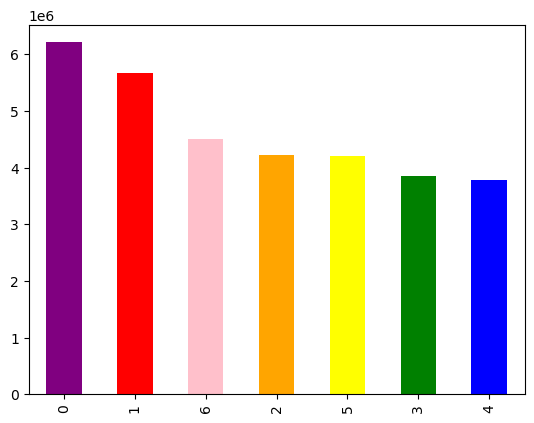

In [8]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


In [25]:
# export graph png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


<Axes: ylabel='Frequency'>

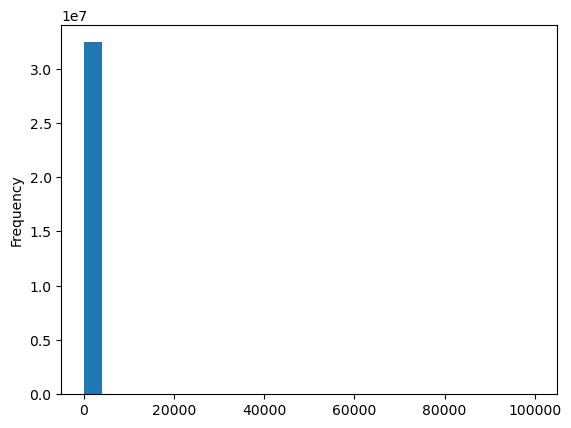

In [9]:
# creating histogram for prices column
ords_prods_merge['prices'].plot.hist(bins = 25)


In [10]:
ords_prods_merge['prices'].mean()

11.98114392296625

In [11]:
ords_prods_merge['prices'].median()

7.4

In [12]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

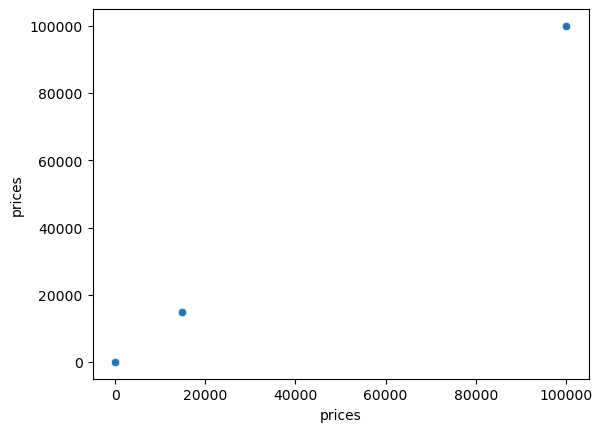

In [13]:
#create scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)


In [14]:
# check for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]


,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,slow_and_busy_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,purchase_frequency,frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly busy,fewest orders,40,Regular customer,108.648299,high spender,NaN,NaN
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly busy,fewest orders,40,Regular customer,108.648299,high spender,NaN,NaN
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly busy,fewest orders,4,New customer,1154.792308,high spender,NaN,NaN
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest days,fewest orders,4,New customer,1154.792308,high spender,NaN,NaN
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest days,fewest orders,16,Regular customer,114.426619,high spender,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest days,fewest orders,39,Regular customer,1106.743956,high spender,NaN,NaN
29193269,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest days,fewest orders,39,Regular customer,1106.743956,high spender,NaN,NaN
29193270,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,slowest days,fewest orders,15,Regular customer,451.153540,high spender,NaN,NaN
29193271,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,slowest days,fewest orders,12,Regular customer,1178.381871,high spender,NaN,NaN


In [15]:
ords_prods_merge['prices'].max()

99999.0

In [16]:
# asign blanks to values >100
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan


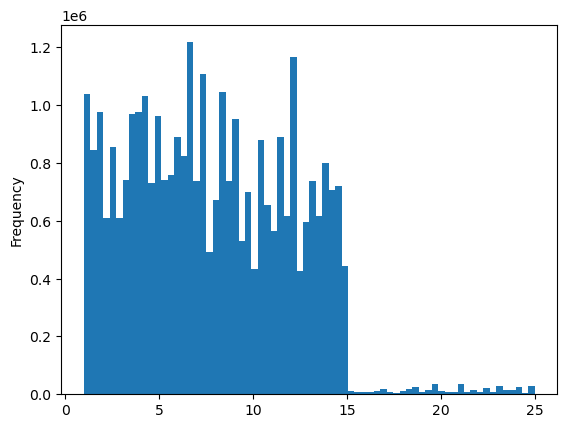

In [17]:
hist2=ords_prods_merge['prices'].plot.hist(bins = 70)


In [40]:
# export graph png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))


In [18]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7


In [19]:
dev

array([False,  True, False, ..., False,  True,  True])

In [20]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [21]:
len(ords_prods_merge)

32434212

In [22]:
len(big)+len(small)

32434212

In [23]:
df_2 = small[['orders_day_of_week','prices']]


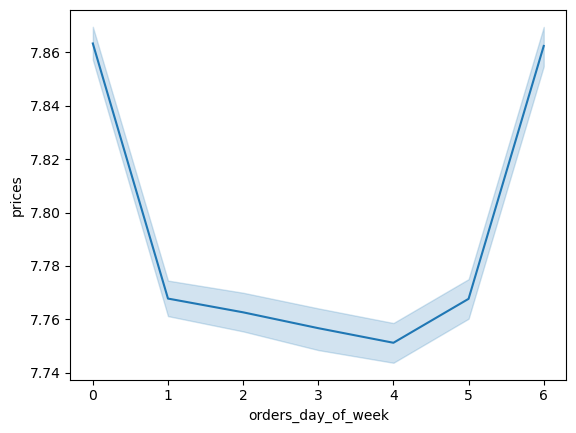

In [25]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
